<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a</li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.histograms import histogram
  
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Первое что бросается в глаза это много колонок с нецелочисленными данными которые вполне можно перевести в целые для облегчения расчетов.
Конечно надо проверить данные с пропусками, какие заменить  а какие исключить, например с отсутсвием названия населенного пункта.

## Предобработка данных

In [2]:
data['balcony'] = data['balcony'].fillna(value=0) #заменим пропуски в балконах на 0
print(data['balcony'].head())


0    0.0
1    2.0
2    0.0
3    0.0
4    0.0
Name: balcony, dtype: float64


Пойдем по порядку. Теперь пропуски в столбце ceiling_height

In [3]:
print(len(data[data['ceiling_height'].isna()]))
print(data['ceiling_height'].median())

9195
2.65


40% данных без указания высоты потолков, заменить их на 0 не разумно. Заменим пропуски медианным значением.


In [4]:
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())

Теперь столбец floors_total проверим

In [5]:
print(len(data[data['floors_total'].isna()]))

86


не так много, заменим их на значение этажа, скорее всего это не повлияет на общую оценку распределения

In [6]:
data['floors_total'] = data['floors_total'].fillna(value=data['floor'])
print(data['floors_total'].unique())


[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15.  1. 20. 28. 36. 21. 35. 34. 60. 29. 33. 52. 37.]


посмотрим пропуски в living_area

In [7]:
print(data[data['living_area'].isna()].head())

    total_images  last_price  total_area first_day_exposition  rooms  \
3              0  64900000.0       159.0  2015-07-24T00:00:00      3   
7              5   7915000.0        71.6  2019-04-18T00:00:00      2   
30            12   2200000.0        32.8  2018-02-19T00:00:00      1   
37            10   1990000.0        45.8  2017-10-28T00:00:00      2   
44            13   5350000.0        40.0  2018-11-18T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  ...  \
3             2.65          14.0          NaN      9          NaN  ...   
7             2.65          24.0          NaN     22          NaN  ...   
30            2.65           9.0          NaN      2          NaN  ...   
37            2.50           5.0          NaN      1          NaN  ...   
44            2.65          22.0          NaN      3          NaN  ...   

    kitchen_area  balcony                        locality_name  \
3            NaN      0.0                      Санкт-Пет

заменим эти пропуски медианным значением жилой площади в зависимости от количества комнат

In [8]:
#сгруппируем данные по количеству комнат и заменим пропуски медианным значением жилой площади
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))
# проверим остались ли пропуски 
print(data['living_area'].isna().sum())

0


Посмотрим что со столбцом is_apartment

In [9]:
print(data['is_apartment'].unique())

[nan False True]


скорее всего отсутствие значения и есть False, так и заменим их на False

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
print(data['is_apartment'].head())

0    False
1    False
2    False
3    False
4    False
Name: is_apartment, dtype: bool


Пропуски в kitchen_area составляют почти 10%, нам нужны эти данные по этому их лучше заполнить медианным значением

In [11]:
#сгруппируем данные по количеству комнат и заменим пропуски медианным значением площади кухни
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))
# проверим остались ли пропуски 
print(data['kitchen_area'].isna().sum())

197


пропусков в locality_name не так много, заменим их на 'Неизвестно'

In [12]:
data['locality_name'] = data['locality_name'].fillna(value='Неизвестно')

пропуски в нанных об удаленности от аэропорта 'airports_nearest' скорее всего говорит о том что близко аэропорта нет, заменим их на 100000

In [13]:
data['airports_nearest'] = data['airports_nearest'].fillna(value=100000)

проверим пропуски в cityCenters_nearest

In [14]:
print(data[data['cityCenters_nearest'].isna()].head())

    total_images  last_price  total_area first_day_exposition  rooms  \
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
22            20   5000000.0       58.00  2017-04-24T00:00:00      2   
30            12   2200000.0       32.80  2018-02-19T00:00:00      1   

    ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
5             2.65          12.0        14.40      5         False  ...   
8             2.65          27.0        15.43     26         False  ...   
12            2.65           5.0        30.00      5         False  ...   
22            2.75          25.0        30.00     15         False  ...   
30            2.65           9.0        17.60      2         False  ...   

    kitchen_area  balcony              locality_name  airports_nearest  \
5           9.10      0.0  городской посёл

Для разных населенных пунктов расстояние до центра может быть разным, заполнить их медианным значением не правильно, лучше оставить их.
Теперь столбец parks_around3000. Пропущенное значение скорее говорит об отсутствии парка в 3 км. Заменим их на 0. И соответственно в столбце parks_nearest заменим пропуски на 3001. Также поступим и со столбцами ponds_around3000 и ponds_nearest

In [15]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['parks_nearest'] = data['parks_nearest'].fillna(value=3001)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=3001)


И столбец days_exposition, объективной причины пропусков сейчас трудно определить но чтобы не терять данные оставим пропуски как есть

Теперь надо изменить типы данных с float на int в тех столбцах в которых не нужно считать дробную часть, и памяти меньше используется и при расчетах проще

In [16]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int', errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23502 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000        236

еще надо изменить тип данных в столбце first_day_exposition на to_datetime

In [17]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


## Расчёты и добавление результатов в таблицу

Чтобы посчитать цену одного метра разделим общую стоимость на общую площадь и добавим в столбец meter_price 

In [18]:
data['meter_price'] = data['last_price'] / data['total_area']
data['meter_price'] = data['meter_price'].astype('int')
data['meter_price'].describe()

count    2.369900e+04
mean     9.942121e+04
std      5.030681e+04
min      1.110000e+02
25%      7.658500e+04
50%      9.500000e+04
75%      1.142560e+05
max      1.907500e+06
Name: meter_price, dtype: float64

добавим столбцы с днем недели месяцем и годом публикации объявления

In [19]:
data['exp_weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['exp_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['exp_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
#проверим столбцы
print(data['exp_weekday'].head(), data['exp_month'].head(), data['exp_year'].head())

0    3
1    1
2    3
3    4
4    1
Name: exp_weekday, dtype: int64 0     3
1    12
2     8
3     7
4     6
Name: exp_month, dtype: int64 0    2019
1    2018
2    2015
3    2015
4    2018
Name: exp_year, dtype: int64


разделим на категории этажность квартир

In [20]:
#функция определяющая категорию
def category_floor(data):
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    return 'другой'
#добавим столбец с категориями 
data['category_floor'] = data.apply(category_floor, axis=1)
#проверим результат
print(data['category_floor'].value_counts())

другой       17363
последний     3419
первый        2917
Name: category_floor, dtype: int64


добавим соотношение жилой площади к общей

In [21]:
data['living_to_total'] = data['living_area'] / data['total_area']
print(data['living_to_total'].head())

0    0.472222
1    0.460396
2    0.612500
3    0.283019
4    0.320000
Name: living_to_total, dtype: float64


добавим соотношение кухни к общей площади

In [22]:
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']
print(data['kitchen_to_total'].head())

0    0.231481
1    0.272277
2    0.148214
3    0.059748
4    0.410000
Name: kitchen_to_total, dtype: float64


## Исследовательский анализ данных

теперь посмотрим на график распределения площадей

60.34865099793241


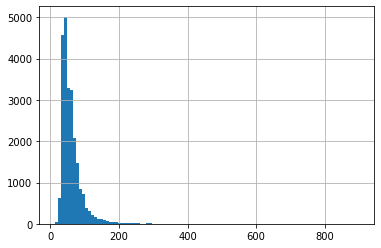

In [23]:
data['total_area'].hist(bins=100)
print(data['total_area'].mean())

подовляющее число продоваемых квартир не превышает 100 кв.м.

проверим распределение по ценам

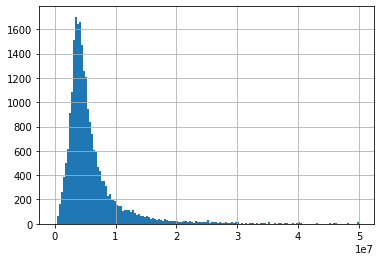

In [24]:
data['last_price'].hist(bins=150, range=(0, 5*10e+6))

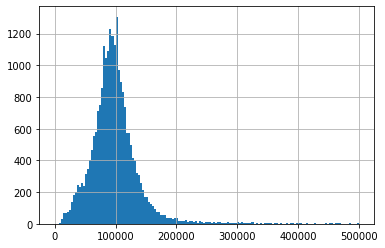

In [25]:
data['meter_price'].hist(bins=150, range=(0, 5*10e+4));

наиболее продаваемые квартиры стоят от 2,5 млн до 6 млн

посмотрим на распределение числа комнат

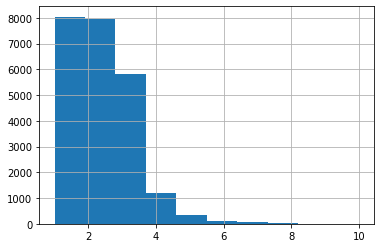

In [26]:
data['rooms'].hist(range=(1, 10));

самые популярные 1 и 2-х комнатные квартиры, у 3-х комнатных тоже высокий спрос по сравнению с квартирами большей комнатностью
проверим распределение высоты потолков

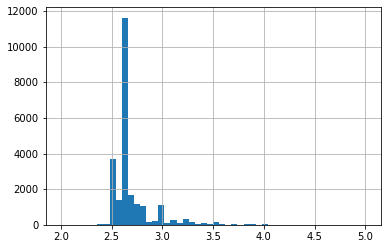

In [27]:
data['ceiling_height'].hist(bins=50, range=(2, 5));

2,7 м самая популярная высота потолков, а ниже 2,6 и выше 3.4 очень редко встречаются

построим гистограмму для время продажи квартиры

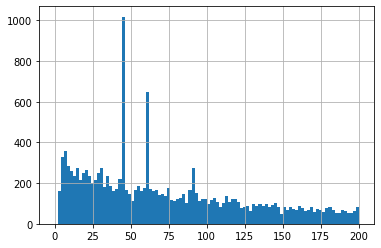

In [28]:
data['days_exposition'].hist(bins=100, range=(0, 200));

какие-то странные скачки 
посмотрим что это за значения

In [29]:
print(data['days_exposition'].value_counts().head(10))

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64


отфильтруем данные без показателей 45, 60

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


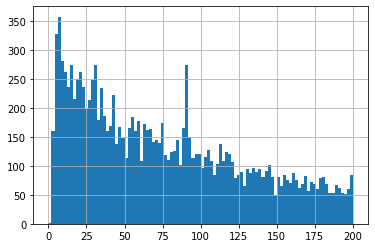

In [30]:
days_exposition_filtered = data.dropna(subset=['days_exposition'])
days_exposition_filtered['days_exposition'] = days_exposition_filtered['days_exposition'].astype('int')
days_exposition_filtered = days_exposition_filtered.query('days_exposition !=45 and days_exposition !=60')
days_exposition_filtered['days_exposition'].hist(bins=100, range=(0, 200))


подсчитаем среднее и медианное значение

In [31]:
print('Среднее значение:', data['days_exposition'].mean())
print('Медианное значение:', data['days_exposition'].median())

Среднее значение: 180.88863436982163
Медианное значение: 95.0


В среднем продажа займет 95 дней.
Посмотрим распределение

In [32]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Теперь можно сказать что продажи до 45 дней быстрые а свыше 232 долгие

Проверим выбивающиеся значения
Возьмем общую площадь. Из графика выше видно что квартир с площадью больше 150 кв.м и меньше 20 кв.м очень мало, отбросим их

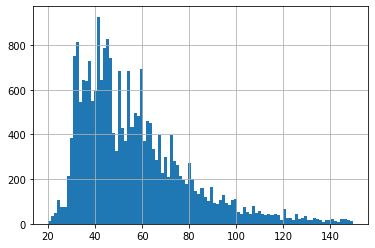

In [33]:
total_area_filtered = data.query('total_area > 20 and total_area < 150')['total_area'].hist(bins=100)
good_data = data.query('total_area > 20 and total_area < 150')

От чего могут зависить пиковые значения у наиболее продаваемых квартир? Может это студии с площадью как у 1-комнатной квартиры а может 2-х комнатная квартира с площадью ка у 1-конатной.
Ясно точно что самые продаваемые квартиры с площадью от 30 до 60 кв.м.

Количество квартиц по цене выше 20 000 000 совсем немного, по этому их можно исключить

4505000.0

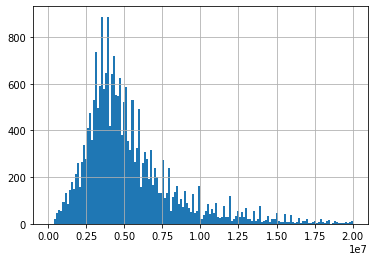

In [34]:
good_data = good_data.query('last_price < 2*10e+6')
good_data['last_price'].hist(bins=150)
good_data['last_price'].median()

В диапазоне от 2500000 до 5000000 есть большие скачки

По числу комнат так же можно не принимать в расчет квартиры с белее 5 комнатами

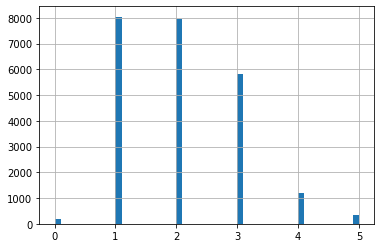

In [35]:
rooms_filtered = data.query('rooms <= 5')['rooms'].hist(bins=50)


Вот это сюрприз, квартиры с 0 комнатами?
такие квартиры тоже исключим

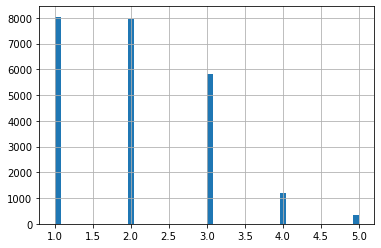

In [36]:
rooms_filtered = data.query('rooms <= 5 and rooms > 0')
rooms_filtered['rooms'].hist(bins=50)
good_data = good_data.query('rooms <= 5 and rooms > 0')

Высота потолков тоже вызывает вопросы, мень 2,5 м можно исключить как и квариты с высотой больше 3,4 м

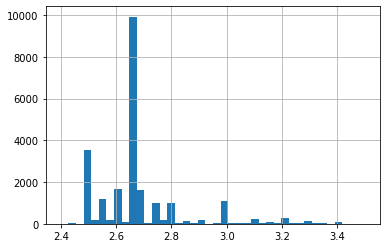

In [37]:
ceiling_height_filtered = data.query('ceiling_height <= 3.4 and ceiling_height > 2.4')
ceiling_height_filtered['ceiling_height'].hist(bins=40,range=(2.4, 3.5))

Чтобы определить как зависит цена от квадратного метра построим сводную таблицу и посмотрим на график

Корреляция : 0.08048377168252696


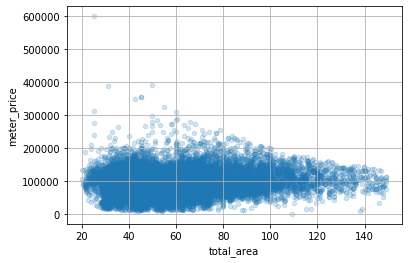

In [38]:
meter_price_to_area = good_data.pivot_table(index='total_area', values='meter_price', aggfunc='median')
good_data.plot(x='total_area', y='meter_price', kind='scatter', alpha=0.2, grid=True)
print('Корреляция :',good_data['total_area'].corr(good_data['meter_price']))

Как видно стоимость квадратного метра не сильно зависит от общей площади

Посмотрим на влияние количества комнат на цену за квадрат

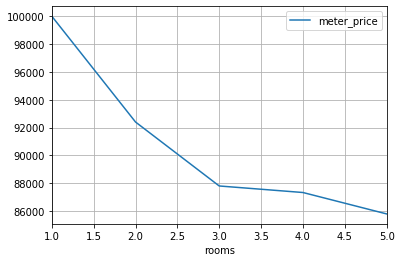

In [39]:
good_data.pivot_table(index='rooms', values='meter_price', aggfunc='median').plot(grid=True)

Как видим у 3-х комнатных квартир цена за квадратный метр значительно ниже

Проверим зависимость от этажа

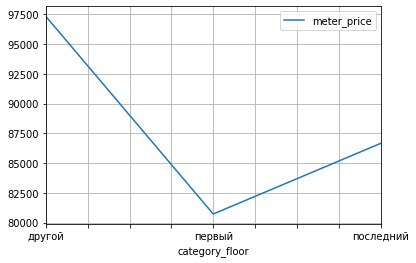

In [40]:
good_data.pivot_table(index='category_floor', values='meter_price', aggfunc='median').plot(grid=True)

На первом и последнем этажах цены заметно ниже

Посмотрим распределение цен в зависимости от удаленности от центра

Корреляция : -0.39488561665069777


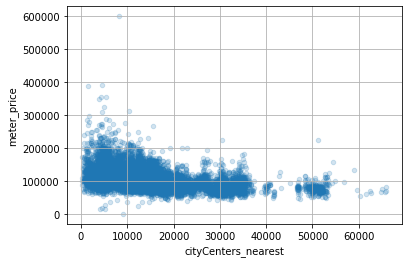

In [41]:
good_data.plot(x='cityCenters_nearest', y='meter_price', kind='scatter', alpha=0.2,grid=True)
print('Корреляция :',good_data['cityCenters_nearest'].corr(good_data['meter_price']))

Чем ближе к центру тем цена выше

Так же проверим влияние даты размещения объявлений

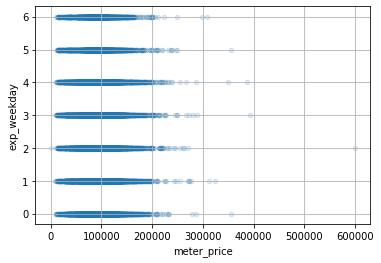

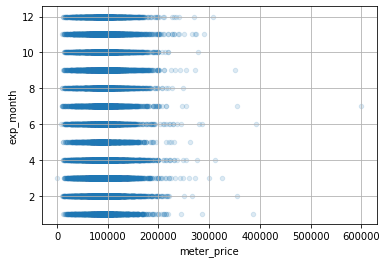

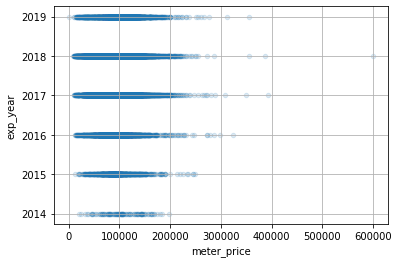

In [42]:
good_data.plot(x='meter_price', y='exp_weekday', kind='scatter', alpha=0.15,grid=True)
good_data.plot(x='meter_price', y='exp_month', kind='scatter', alpha=0.15,grid=True)
good_data.plot(x='meter_price', y='exp_year', kind='scatter', alpha=0.15,grid=True)

Цена в 2014 ниже последующих лет, в 2017 2018 годах практически одинаковые а в 2019 заметно небольшое снижение.
Интересно что объявления размещенные в мае по меньшей стоимости в сравнении с другими месяцами
А вот день недели практически не влияет на стоимость

Найдем 10 населенных пунктов с наибольшим числом объявлений

In [43]:
top_price = good_data.pivot_table(index='locality_name', values='meter_price',\
                                  aggfunc=['count', 'mean', 'min', 'max']).\
sort_values(('count', 'meter_price'), ascending=False).head(10).round({('mean', 'meter_price'): 2})
top_price

,count,mean,min,max
,meter_price,meter_price,meter_price,meter_price
locality_name,,,,
Санкт-Петербург,14692,108709.18,111,600000
посёлок Мурино,494,85026.32,50000,138580
посёлок Шушары,436,78405.28,47700,134000
Всеволожск,389,67225.75,31400,136423
Пушкин,354,101898.48,59836,167410
Колпино,337,75332.87,47957,125000
посёлок Парголово,322,90448.00,48405,138522
Гатчина,307,68745.69,10507,146315


In [44]:
print(top_price.sort_values(('min', 'meter_price')).head(1))
print(top_price.sort_values(('max', 'meter_price')).head(1))

                      count        mean         min         max
                meter_price meter_price meter_price meter_price
locality_name                                                  
Санкт-Петербург       14692   108709.18         111      600000
                    count        mean         min         max
              meter_price meter_price meter_price meter_price
locality_name                                                
Выборг                235    58075.47       18750       94805


Проанализируем цены в Санкт-Петербурге

In [45]:
data_spb = good_data.query( "locality_name == 'Санкт-Петербург'" )
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,exp_weekday,exp_month,exp_year,category_floor,living_to_total,kitchen_to_total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,NaN,120370,3,3,2019,другой,0.472222,0.231481
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574,558.0,92785,3,8,2015,другой,0.612500,0.148214
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121.0,100000,1,6,2018,другой,0.320000,0.410000
7,5,7915000,71.6,2019-04-18,2,2.65,24,30.5,22,False,...,0,3001,NaN,110544,3,4,2019,другой,0.425978,0.263966
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,0,3001,289.0,88524,6,2,2017,другой,0.714754,0.106557


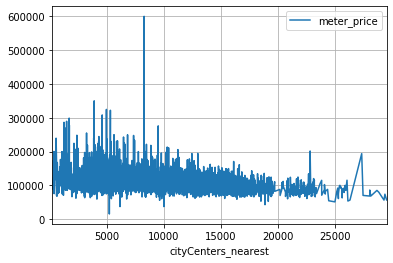

In [46]:
#Построим график зависимости цен от удаленности от центра
data_spb.pivot_table(index='cityCenters_nearest', values='meter_price').plot(grid=True)

Заметная разница в цене у квартир до 5 км от центра, потом цены снижаются после 10 км от центра.

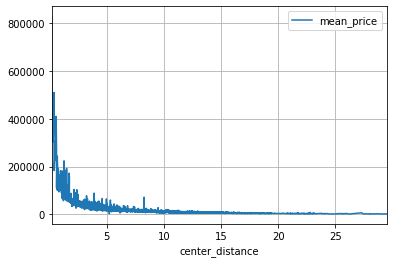

In [47]:
pd.set_option('mode.chained_assignment', None)
data_spb['center_distance'] = data_spb['cityCenters_nearest'] / 1000
data_spb['center_distance'].round()
data_spb['mean_price'] = data_spb['meter_price'] / data_spb['center_distance']
data_spb.pivot_table(index='center_distance', values='mean_price').plot(grid=True)

В радиусе 5-10 км от центра квартиры можно отнести к центральным, так как стоимость за каждый метр выше, стоимость дальше 10 км.

Корреляция : center_distance -0.11707984063444078
Корреляция : total_area -0.13078701343636917
Корреляция : rooms -0.2873876355219692
Корреляция : ceiling_height 0.1920607835406483


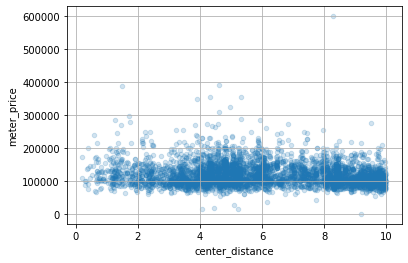

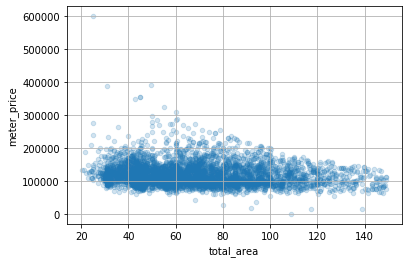

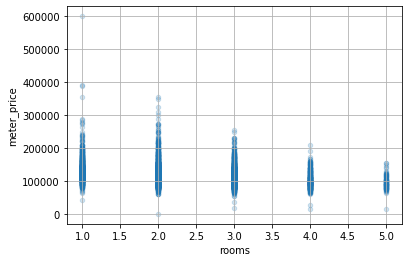

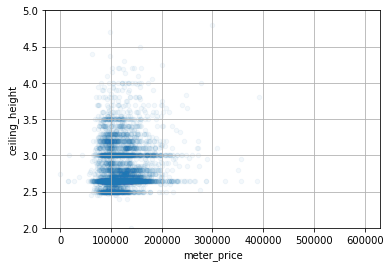

In [48]:
data_spb_center = data_spb.query('center_distance <= 10')
for name in data_spb_center[['center_distance', 'total_area', 'rooms']]:
    #data_spb_center[name].hist(bins=50, alpha=0.2)
    data_spb_center.plot(x=name, y='meter_price', kind='scatter', alpha=0.2,grid=True)
    print('Корреляция :', name, data_spb_center['meter_price'].corr(data_spb_center[name]))

data_spb_center.plot(y='ceiling_height', x='meter_price', kind='scatter', alpha=0.05,grid=True)
plt.ylim(2, 5)
print('Корреляция :', 'ceiling_height', data_spb_center['meter_price'].corr(data_spb_center['ceiling_height']))

Проанализировав центр Санкт-Петербурга можно сказать что рост стоимости квадратного метра начинается не в самом центре а от 3-х до 6 км. Тут надо уточнить конечно что берется за центр города. Дальше идет общее снижение.
С увеличением общей площади квартиры стоимость квадратного метра уменьшается с коэффициентом корреляции -0,13.
Такое же влияние на стоимость оказывает количество комнат, чем больше тем дешевле за квадратный метр но только с большей долей уменьшения..
Цена квадратного метра будет выше у квартир с высотой потолков 2,7-2,8 метра, а дальше с увеличением высоты цена снижается..


 В результате выявили что 1 и 2-х комнатные квартиры продаются дороже по цене за квадратный метр, а вот если это первый или последний этаж в здании то цена будет снижена.
 Безусловно близость к центру повышает стоимость квадратного метра квартиры.
 А вот когда размещать объявление на стоимость сильно не влияет.

## Общий вывод

Вывд:
В среднем продажа квартиры занимает 95 дней. Если объявление опубликовано больше 232 дней то это продажа уже длительная.
Наибольший спрос на квартиры площадью от 30 до 60 кв.м.
Большей популярностью пользуются 1 и 2-х комнатные квартиры, да и в центре Санк-Перербурга 3-х комнатные тоже популярны.
Не смотря на то что в среднем стоимость 3-х комнатных квартир ниже.
2,7 м самая популярная высота потолков в продаваемых квартирах.
Чем больше площадь квартиры тем ниже стоимость каждого метра.
И с увеличением количества комнат цена за квадратный метр уменьшается.
Цена так же снизится если это первый или последний этаж в здании.
На увеличении стоимости сильно влияет близость к центру города.